Navid Azadegan 

In [50]:
import pandas as pd
import numpy as np
from datetime import datetime
import plotly

pd.options.display.max_rows=500 #pd.set_option('display.max_rows', 500 )

%matplotlib inline


Data Gathering

In [51]:
data_path1='file:///C:/Users/navid/covid/data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
data_path2='file:///C:/Users/navid/covid/data/raw/COVID-19/csse_covid_19_data/UID_ISO_FIPS_LookUp_Table.csv'
data_path3='file:///C:/Users/navid/covid/data/raw2/COVID-19/data_tables/vaccine_data/global_data/time_series_covid19_vaccine_doses_admin_global.csv'
pd_raw1=pd.read_csv(data_path1) #covid cases
pd_raw2=pd.read_csv(data_path2) #Country Population
pd_raw3=pd.read_csv(data_path3) #Vaccine data
data_path4='C:/Users/navid/covid/data/processed/saved_covid.csv'#processed raw1

Data Preparation

In [52]:
Time_indx=pd_raw1.columns[4:]
Time_indx3=pd_raw3.columns[12:]

In [53]:
df_plot=pd.DataFrame({'data':Time_indx})
df_plot3=pd.DataFrame({'data':Time_indx3})


#df_plot3.head()
#pd_raw['Country/Region'].unique()
#df_plot3

In [54]:
Country_list=['Iran',
              'Germany',
              'US']

In [55]:
for each in Country_list:
   df_plot3[each]=np.array(pd_raw3[pd_raw3['Country_Region']==each].iloc[:,12::].sum(axis=0))

In [56]:
for each in Country_list:
    Country_Population=max(pd_raw2[pd_raw2['Country_Region']==each].Population)
    df_plot[each]=np.array(pd_raw1[pd_raw1['Country/Region']==each].iloc[:,4::].sum(axis=0)/Country_Population)
  

In [57]:
df_plot.head()

,data,Iran,Germany,US
0,1/22/20,0.0,0.0,3.035212e-09
1,1/23/20,0.0,0.0,3.035212e-09
2,1/24/20,0.0,0.0,6.070424e-09
3,1/25/20,0.0,0.0,6.070424e-09
4,1/26/20,0.0,0.0,1.517606e-08


<AxesSubplot:xlabel='data'>

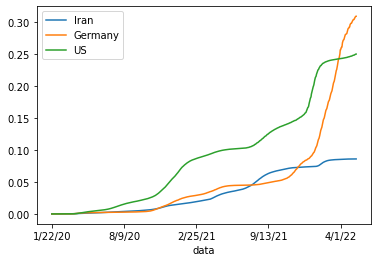

In [58]:

df_plot.set_index('data').plot()

In [59]:
df_plot3['data']=df_plot3.data.astype('datetime64[ns]')

In [60]:
df_plot3.head()

,data,Iran,Germany,US
0,2020-12-12,0.0,0.0,0.0
1,2020-12-13,0.0,0.0,0.0
2,2020-12-14,0.0,0.0,50.0
3,2020-12-15,0.0,0.0,1058.0
4,2020-12-16,0.0,0.0,12835.0


<AxesSubplot:xlabel='data'>

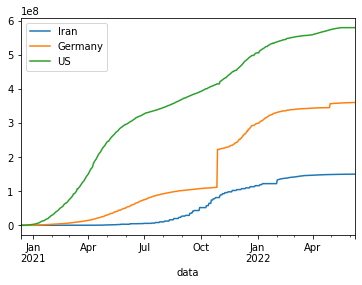

In [61]:
df_plot3.set_index('data').plot()

Data Type (4.2)

In [62]:
datetime.strptime(df_plot.data[0],"%m/%d/%y")

datetime.datetime(2020, 1, 22, 0, 0)

In [63]:
time_idx=[datetime.strptime( each,"%m/%d/%y") for each in df_plot.data]


In [64]:
time_str=[each.strftime('%Y-%m-%d') for each in time_idx] 


In [65]:
df_plot['data']=time_idx

In [66]:
df_plot.head()

,data,Iran,Germany,US
0,2020-01-22,0.0,0.0,3.035212e-09
1,2020-01-23,0.0,0.0,3.035212e-09
2,2020-01-24,0.0,0.0,6.070424e-09
3,2020-01-25,0.0,0.0,6.070424e-09
4,2020-01-26,0.0,0.0,1.517606e-08


-------------------------------------------------------------------------------Saving Data--------------------------------------------

In [67]:
df_plot.to_csv(data_path4, index= False)

Data Arragging (5.1)

In [68]:
pd_data_base=pd_raw1.rename(columns={'Country/Region':'country','Province/State':'state'})
pd_data_base=pd_data_base.drop(['Lat', 'Long'], axis=1)

In [69]:
#pd_data_base

In [70]:
pd_data_base.set_index(['state','country'])
pd_data_base.set_index(['state','country']).T
test_pd=pd_data_base.set_index(['state','country']).T

In [71]:
#test_pd.columns

In [72]:
test_pd.stack(level=(0,1))

         state              country    
1/22/20  NaN                Afghanistan         0.0
                            Albania             0.0
                            Algeria             0.0
                            Andorra             0.0
                            Angola              0.0
                                             ...   
5/14/22  Western Australia  Australia      548467.0
         Xinjiang           China            1008.0
         Yukon              Canada           4318.0
         Yunnan             China            2127.0
         Zhejiang           China            3130.0
Length: 240540, dtype: float64

In [73]:
pd_relational_model=test_pd.stack(level=(0,1)).reset_index()

In [74]:
#pd_relational_model

In [75]:
pd_relational_model=pd_relational_model.rename(columns={'level_0':'date', 0:'confirmed'})

In [76]:
pd_relational_model

,date,state,country,confirmed
0,1/22/20,NaN,Afghanistan,0.0
1,1/22/20,NaN,Albania,0.0
2,1/22/20,NaN,Algeria,0.0
3,1/22/20,NaN,Andorra,0.0
4,1/22/20,NaN,Angola,0.0
...,...,...,...,...
240535,5/14/22,Western Australia,Australia,548467.0
240536,5/14/22,Xinjiang,China,1008.0
240537,5/14/22,Yukon,Canada,4318.0
240538,5/14/22,Yunnan,China,2127.0


In [77]:
pd_relational_model.dtypes

date          object
state         object
country       object
confirmed    float64
dtype: object

In [78]:
pd_relational_model['date']=pd_relational_model.date.astype('datetime64[ns]')

In [79]:
pd_relational_model.dtypes

date         datetime64[ns]
state                object
country              object
confirmed           float64
dtype: object

---------------------------------------------------------------------------------processed data saved

In [80]:
pd_relational_model.to_csv('C:/Users/navid/covid/data/processed/covid_confirmed.csv',index=False)

In [81]:
df_plot3.dtypes  #Vaccine Doses

data       datetime64[ns]
Iran              float64
Germany           float64
US                float64
dtype: object

In [82]:
df_plot.dtypes #Relative Covid Cases

data       datetime64[ns]
Iran              float64
Germany           float64
US                float64
dtype: object

------------------------------------------------------------------------------Ploting (5.2)

In [83]:
#import plotly.express as px
#fig = px.scatter(x=[1, 2 , 3 , 4 , 5], y=[0, 1, 4, 9, 16])
#fig.show()

In [84]:
plotly.__version__

'5.6.0'

In [85]:
import plotly.graph_objects as go

In [86]:
fig=go.Figure()

In [87]:
for each in Country_list:
    fig.add_trace(go.Scatter(x=df_plot.data,y=df_plot[each],mode='markers+lines', name=each))

fig.update_layout(width=1000, height=600, xaxis_title="Time", yaxis_title="Relative Covid confirmed Cases(Source: John Hopkins csse)")
#fig.update_layout(xaxis_rangeslider_visible=True)
#fig.update_yaxis(type="log",range=[1.1,5.5])

#fig.show(renderer='chrome')

ValueError: Can't locate a browser with key in ('chrome', 'google-chrome')

Figure({
    'data': [{'mode': 'markers+lines',
              'name': 'Iran',
              'type': 'scatter',
              'x': array([datetime.datetime(2020, 1, 22, 0, 0),
                          datetime.datetime(2020, 1, 23, 0, 0),
                          datetime.datetime(2020, 1, 24, 0, 0), ...,
                          datetime.datetime(2022, 5, 12, 0, 0),
                          datetime.datetime(2022, 5, 13, 0, 0),
                          datetime.datetime(2022, 5, 14, 0, 0)], dtype=object),
              'y': array([0.        , 0.        , 0.        , ..., 0.08604344, 0.08604803,
                          0.08605106])},
             {'mode': 'markers+lines',
              'name': 'Germany',
              'type': 'scatter',
              'x': array([datetime.datetime(2020, 1, 22, 0, 0),
                          datetime.datetime(2020, 1, 23, 0, 0),
                          datetime.datetime(2020, 1, 24, 0, 0), ...,
                          datetime.datetime(2022, 5, 12, 0, 0),
                          datetime.datetime(2022, 5, 13, 0, 0),
                          datetime.datetime(2022, 5, 14, 0, 0)], dtype=object),
              'y': array([0.        , 0.        , 0.        , ..., 0.30860235, 0.30934625,
                          0.30942022])},
             {'mode': 'markers+lines',
              'name': 'US',
              'type': 'scatter',
              'x': array([datetime.datetime(2020, 1, 22, 0, 0),
                          datetime.datetime(2020, 1, 23, 0, 0),
                          datetime.datetime(2020, 1, 24, 0, 0), ...,
                          datetime.datetime(2022, 5, 12, 0, 0),
                          datetime.datetime(2022, 5, 13, 0, 0),
                          datetime.datetime(2022, 5, 14, 0, 0)], dtype=object),
              'y': array([3.03521195e-09, 3.03521195e-09, 6.07042390e-09, ..., 2.49875909e-01,
                          2.50167098e-01, 2.50215941e-01])}],
    'layout': {'height': 600,
               'template': '...',
               'width': 1000,
               'xaxis': {'title': {'text': 'Time'}},
               'yaxis': {'title': {'text': 'Relative Covid confirmed Cases(Source: John Hopkins csse)'}}}
})